### Copy paste the match and agent definitons from the exercise before

In [124]:
PDGAME = {('C','C'): (2, 2), ('C', 'D'): (0, 3), ('D', 'C'): (3, 0), ('D','D'): (1, 1)}

import random 
import string
import collections

class Agent:
    def __init__(self, name=None, opponent=None):        
        self.typ = None 
        
        if name:
            self.name = name            
        else:
            self.name = ''.join(random.choices(string.ascii_lowercase, k=5))
        
        self.payoff = 0
        
        self.opponent = opponent
        
    def earn(self, points):
        self.payoff += points
        
    def reproduce(self):
        return self.__class__()
        
    def __repr__(self):
        return f"(N: {self.name} T: {self.typ} P: {self.payoff})"

    
class TitForTat(Agent):
    def __init__(self):
        super().__init__()
        self.typ = 'tft'
    
    def respond(self, action=None):
        if action == 'D':
            return 'D'
        else:
            return 'C'

class Cooperator(Agent):
    def __init__(self):
        super().__init__()
        self.typ = 'coop'

    def respond(self, action=None):
        return 'C'
    
    
class Defector(Agent):
    def __init__(self):
        super().__init__()
        self.typ = 'def'

    def respond(self, action=None):
        return 'D'
    
    
class Randomer(Agent):
    def __init__(self):
        super().__init__()
        self.typ = 'rnd'

    def respond(self, action=None):
        return random.choice(['C', 'D'])
    

In [125]:
class Match:
    def __init__(self, players, turns=10):
        self.players = players
        
        self.p1 = players[0]
        self.p2 = players[1]
        
        self.turns = turns
        
        self.previous_actions = [None, None]
        
        self.current_round = 0

    def play_round(self, verbose=False):
        # get responses
        response1=self.p1.respond(self.previous_actions[1]) # respond to p2's previous action
        response2=self.p2.respond(self.previous_actions[0]) # respond to p1's previous action
    
        
        payoffs = PDGAME[(response1, response2)]
        
        self.p1.earn(payoffs[0])
        self.p2.earn(payoffs[1])
        
        if verbose is True:
            print(f"P1 ({self.p1.typ}) plays {response1} and p2 ({self.p2.typ}) plays {response2} and they got {payoffs}")
        
        
        # update previous rounds
        self.previous_actions = [response1, response2]
        
    def play(self, verbose=False):
        for i in range(self.turns):
            self.play_round(verbose)
            
        # print(self.p1.payoff, self.p2.payoff)

In [153]:
possible_classes = [TitForTat, Defector, Cooperator, Randomer]

In [135]:
class Population:
    def __init__(self, num_agents):
        
        if not num_agents % 2 == 0:
            print("hey this not even!. it may not work!")
        
        self.agents = [] 
        self.matches = []
        self.generation = 0
        self.type_history = []
        
        
        for i in range(num_agents):
            my_random_agent = random.choice(possible_classes)()  #<- here it is a trick ()
            
            self.agents.append(my_random_agent)

    def pair_agents(self):        
        random.shuffle(self.agents)
        
        half_number = int(len(self.agents) / 2)
        
        part1 = self.agents[:half_number]
        part2 = self.agents[half_number:]
        
        
        for i in range(len(part1)):
            new_match = Match([part1[i], part2[i]])
            new_match.play()
            
            self.matches.append(new_match)

    def get_points(self):
        points = [a.payoff for a in self.agents]
        return points
    
    def get_types(self):
        typs = [a.typ for a in self.agents]
        return typs
    
    def count_types(self):
        typs = self.get_types()
        return collections.Counter(typs)

    def get_fitnesses(self):
        points = self.get_points()
        total_points = sum(points)
        
        # if you need some exceptions, define it.
        if total_points == 0:
            n_agents = len(self.agents)
            
            fitnesses = [1/n_agents for i in range(n_agents)]
        
        if total_points > 0:
            fitnesses = [p/total_points for p in points]
        
        return fitnesses
    
    def reproduce(self):
        agents_to_reproduce = random.choices(self.agents, 
                                             self.get_fitnesses(), 
                                             k=len(self.agents))
        
        new_agents = []
        
        for a in agents_to_reproduce:
            newborn = a.reproduce()
            
            new_agents.append(newborn)
            self.agents = new_agents
            
    def step(self): 
        # this is usually the recipe for each round
        self.type_history.append(self.count_types())
        self.pair_agents()        
        self.reproduce()
        self.generation += 1

In [148]:
my_pop = Population(200)

In [149]:
for i in range(100):
    my_pop.step()


In [150]:
import pandas as pd

df=pd.DataFrame(my_pop.type_history)
df=df.fillna(0)
print(df)

df.to_csv("my_data.csv")

     rnd  tft  coop   def
0   49.0   54  49.0  48.0
1   53.0   60  33.0  54.0
2   53.0   63  28.0  56.0
3   54.0   59  26.0  61.0
4   51.0   58  15.0  76.0
..   ...  ...   ...   ...
95   0.0  200   0.0   0.0
96   0.0  200   0.0   0.0
97   0.0  200   0.0   0.0
98   0.0  200   0.0   0.0
99   0.0  200   0.0   0.0

[100 rows x 4 columns]


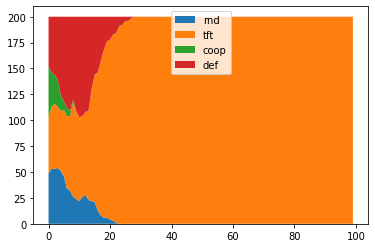

In [152]:
import matplotlib.pyplot as plt

plt.stackplot(range(len(df)), df.T, labels=df.columns)
plt.legend(loc="upper center")

## Population basics

### 13.1 Create a `Population` class. It should take `num_agents` as an initial value. Write a procedure to create number of generic agents from the Agent class.

### 13.2 Can you use list comprehension to shorten the class generation loop?


### 13.3 Now we have a list of generic agents. How can we create random agents from a child class?
#### Hint: random.choice may help you. But now you are not just picking a number or a string but a class. Can you exploit the flexibilty of python to generate it just in place.

### 13.4 Now we need to generate pairs (or matches). We can of course take the agents two-by-two. Since we have a random generation process that wouldn't hurt. But it is a good practice to use a random matching. Can you think of a method doing this.

## Fitness and regeneration

### 13.5 We need some sort of calculation for fitness variable. What information do we need to calculate the individual fitness of each individual?

### 13.6 How can we regenerate the agents based on their fitnesses? 

### 13.7 It would be useful to have a `regenerate` method for the agent. How do you think we can implement such a function.

### 13.8 Write a regeneration function for the population which recreates all the agents from scratch based on their fitness.

### 13.9 Identify what else we need to implement it. (I might have forgotten somehing). When done create a `step()` function to automatize methods to run in each step.


### 11.8 Imagine a situation that we get 0 points from everybody? What kind of a problem it would create? How would you solve the problem?

### 11.9 We used `Counter` function from library `collections`. This is a helpful function which counts each unique list items. Can you convert this step as a method for the which counts types with the name `count_types()`

### Notice that it returns a special object called `Counter` wrapped to a dictionary. Check the documentation for it and find out what you can do with it? Can you use it as a dictionary directly?

### In these simulations, we took the payoff of an individual as the fitness. And we defined fitness as an individual level. So in this current form, if a type dies out, it cannot be present in the following rounds. Lets think of another scenario where there is a 0.1 chance that the replacement will be a mutation: one agent with a random type in the simulation. Implement such a mutation (add as a parameter) and see what happens.